In [2]:
class SimpleClass():
    def __init__(self):
        print('Hola')
    def yell(self):
        print("Shouting")

In [3]:
s = "Hello"

In [4]:
type(s)

str

In [5]:
x = SimpleClass()

Hola


In [6]:
type(x)

__main__.SimpleClass

In [7]:
x.yell()

Shouting


In [8]:
class Extend(SimpleClass):
    
    def __init__(self):
        print("Extended")
        super().__init__()

In [9]:
y = Extend()

Extended
Hola


In [10]:
y.yell()

Shouting


In [11]:
y.__init__()

Extended
Hola


## Operations in Graph

In [12]:
class Operations():
    
    def __init__(self, input_nodes = []):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
        
        
        _default_graph.operations.append(self)
        
    def compute(self):
        pass

In [13]:
class add(Operations):
    
    def __init__(self,x,y):
        super().__init__([x,y])
    
    def compute(self, x, y):
        self.inputs = [x, y]
        return x + y

In [14]:
class mul(Operations):
    
    def __init__(self,x,y):
        super().__init__([x,y])
    
    def compute(self, x, y):
        self.inputs = [x, y]
        return x*y

In [15]:
class matmul(Operations):
    
    def __init__(self,x,y):
        super().__init__([x,y])
    
    def compute(self, x, y):
        self.inputs = [x, y]
        return x.dot(y)

In [16]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        _default_graph.placeholders.append(self)

In [17]:
class Variable():
    
    def __init__(self, intial_value=None):
        
        self.value = intial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [18]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_global(self):
        global _default_graph
        _default_graph = self

In [19]:
g = Graph()

In [42]:
g.set_as_global()

In [43]:
A = Variable(10)

In [44]:
b = Variable(5)

In [45]:
x = Placeholder()

In [46]:
y = mul(A, x)

In [50]:
z = add(y, b)

In [57]:
y.input_nodes[0].value

10

In [77]:
def transverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operations):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [78]:
import numpy as np

In [109]:
class Session():
    
    def run(self, operation, feed_dict={}):
        
        nodes_postorder = transverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
            
            elif type(node) == Variable:
                
                node.output = node.value
            
            else:
                print(node.input_nodes)
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                print(node)
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

In [110]:
ses = Session()

In [111]:
res = ses.run(operation=z,feed_dict={x:[12,14]})

[<__main__.Variable object at 0x7f1b403ab048>, <__main__.Placeholder object at 0x7f1b403ab080>]
[<__main__.mul object at 0x7f1b403ab1d0>, <__main__.Variable object at 0x7f1b403ab0b8>]


In [108]:
res

array([125, 145])

In [250]:
g = Graph()

g.set_as_global()

A = Variable([[10,20],[14,231],[231,324]])

b = Variable([[1,4],[2,3],[1,2]])

x = Placeholder()

y = matmul(A, x)

z = add(y,b)

In [126]:
ses.run(z, {x:10})

[<__main__.Variable object at 0x7f1b400a76a0>, <__main__.Placeholder object at 0x7f1b400a7630>]
[<__main__.matmul object at 0x7f1b400a76d8>, <__main__.Variable object at 0x7f1b400a70b8>]


array([[ 101,  204],
       [ 142, 2313],
       [2311, 3242]])

# Classification
## Activation func

In [127]:
import matplotlib.pyplot as plt

In [128]:
def sig(z):
    return 1/(1+np.exp(-z))

In [129]:
sample_z = np.linspace(-10,10,200)
sample_x = sig(sample_z)

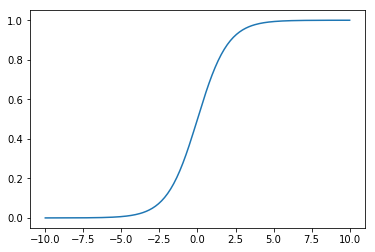

In [130]:
plt.plot(sample_z, sample_x)

In [277]:
class Sigmoid(Operations):
    def __init__(self, z):
        
        super().__init__([z])
        
    def compute(self, z_v):
        return 1/(1+np.exp(-z_v))

In [139]:
from sklearn.datasets import make_blobs

In [140]:
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=42)

In [141]:
data

(array([[  4.6040528 ,   3.53781334],
        [ -3.11090424,  10.86656431],
        [ -3.83738367,   9.21114736],
        [ -2.44166942,   7.58953794],
        [ -3.52202874,   9.32853346],
        [ -3.10983631,   8.72259238],
        [ -3.4172217 ,   7.60198243],
        [  4.93599911,   2.23422496],
        [  5.55528095,   2.30192079],
        [ -1.68665271,   7.79344248],
        [  4.29716432,   1.17089241],
        [  4.24777068,   0.50965474],
        [ -1.04354885,   8.78850983],
        [  5.00127444,   3.51120625],
        [ -2.96983639,  10.07140835],
        [  4.1607046 ,   1.78751071],
        [ -2.62484591,   8.71318243],
        [  5.45240466,   3.32940971],
        [ -2.26723535,   7.10100588],
        [  3.80066131,   1.66395731],
        [  6.11777288,   1.45489947],
        [ -3.05358035,   9.12520872],
        [ -3.18611962,   9.62596242],
        [ -2.97261532,   8.54855637],
        [  2.02013373,   2.79507219],
        [ -4.23411546,   8.4519986 ],
        [  5

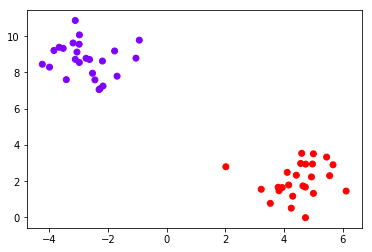

In [162]:
plt.scatter(data[0][:,0],data[0][:,1],cmap='rainbow',
            c=data[1])

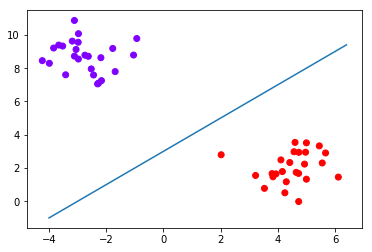

In [234]:
x = np.linspace(-4,6.4,10)
y = (x + 3)
plt.scatter(data[0][:,0],data[0][:,1],cmap='rainbow',
            c=data[1])
plt.plot(x,y)

In [ ]:
x = Placeholder()

In [235]:
np.array([1,1]).dot(np.array([[4],[2]])) + 3

array([9])

In [247]:
np.array([1,1]).dot(np.array([[-3],[-3]])) + 3

array([-3])

In [278]:
g = Graph()

g.set_as_global

x = Placeholder()

w = Variable([1,1])

b = Variable(-5)

z = add(matmul(w,x),b)

a = Sigmoid(z)

In [279]:
ses.run(a,feed_dict={x: [2,4]})

[<__main__.Variable object at 0x7f1b15602e48>, <__main__.Placeholder object at 0x7f1b15602780>]
[<__main__.matmul object at 0x7f1b15602048>, <__main__.Variable object at 0x7f1b15602ac8>]


0.7310585786300049

In [280]:
ses.run(a,feed_dict={x: [0,-10]})

[<__main__.Variable object at 0x7f1b15602e48>, <__main__.Placeholder object at 0x7f1b15602780>]
[<__main__.matmul object at 0x7f1b15602048>, <__main__.Variable object at 0x7f1b15602ac8>]


3.0590222692562472e-07